In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
from sklearn.pipeline import Pipeline
 # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin 
# To create a box-cox transformation class
from collections import Counter

In [77]:
gpp_df = pd.read_csv(r"C:\Users\SONY\Downloads\global_power_plant_database.csv")
gpp_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [78]:
gpp_df.shape

(34936, 36)

In [79]:
gpp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [80]:
gpp_df.isnull().sum()

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


In [81]:
gpp_df.drop(['owner','source','url','country','gppd_idnr'], axis=1,inplace = True)


In [82]:
gpp_df.drop(['wepp_id','year_of_capacity_data','commissioning_year'], axis=1,inplace = True)


In [83]:
gpp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country_long                    34936 non-null  object 
 1   name                            34936 non-null  object 
 2   capacity_mw                     34936 non-null  float64
 3   latitude                        34936 non-null  float64
 4   longitude                       34936 non-null  float64
 5   primary_fuel                    34936 non-null  object 
 6   other_fuel1                     1944 non-null   object 
 7   other_fuel2                     276 non-null    object 
 8   other_fuel3                     92 non-null     object 
 9   geolocation_source              34517 non-null  object 
 10  generation_gwh_2013             6417 non-null   float64
 11  generation_gwh_2014             7226 non-null   float64
 12  generation_gwh_2015             

In [84]:
gpp_df.other_fuel1.unique()

array([nan, 'Oil', 'Solar', 'Gas', 'Other', 'Hydro', 'Coal', 'Petcoke',
       'Biomass', 'Waste', 'Cogeneration', 'Storage', 'Wind'],
      dtype=object)

In [85]:
gpp_df['other_fuel1'] = gpp_df['other_fuel1'].map({'Oil':0,'Solar':1,'Gas':2,'Hydro':3,'Coal':4,'Petcoke':5,'Biomass':6,'Waste':7,'Cogeneration':8,'Storage':9,'Wind':10,'Other':11})

In [86]:
gpp_df.other_fuel2.unique()

array([nan, 'Other', 'Oil', 'Biomass', 'Gas', 'Solar', 'Waste', 'Storage',
       'Hydro', 'Wind', 'Coal', 'Petcoke'], dtype=object)

In [87]:
gpp_df['other_fuel2'] = gpp_df['other_fuel2'].map({'Oil':0,'Solar':1,'Gas':2,'Hydro':3,'Coal':4,'Petcoke':5,'Biomass':6,'Waste':7,'Storage':8,'Wind':9,'Other':10})

In [88]:
gpp_df.other_fuel3.unique()

array([nan, 'Other', 'Gas', 'Solar', 'Biomass', 'Hydro', 'Oil', 'Wind',
       'Storage'], dtype=object)

In [89]:
gpp_df['other_fuel3'] = gpp_df['other_fuel3'].map({'Oil':9,'Solar':1,'Gas':2,'Hydro':3,'Biomass':4,'Waste':5,'Storage':6,'Wind':7,'Other':8})

In [90]:
gpp_df['other_fuel1'].fillna(gpp_df['other_fuel1'].mode()[0], inplace=True)


In [91]:
gpp_df['other_fuel2'].fillna(gpp_df['other_fuel2'].mode()[0], inplace=True)


In [92]:
gpp_df['other_fuel3'].fillna(gpp_df['other_fuel3'].mode(), inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

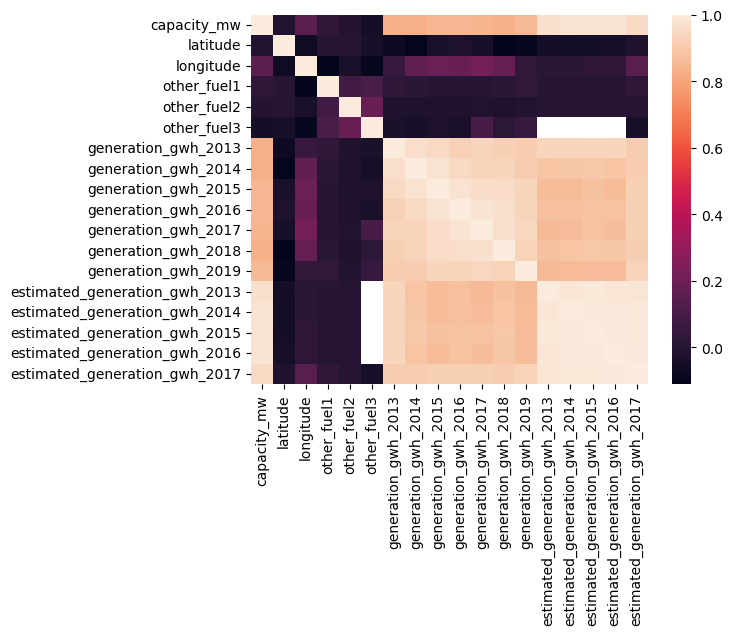

In [93]:
sns.heatmap(gpp_df.corr())
plt.show

In [94]:
gpp_df.generation_data_source.unique()

array([nan, 'Australia Clean Energy Regulator', 'JRC-PPDB-OPEN', 'ENTSOE',
       'Agencia de Regulacion y Control de Electricidad',
       'Egyptian Electricity Holding Company', 'IAEA',
       'Volta River Authority',
       'Guatemala Energy Data Visualization Center at Universidad Rafael Landivar',
       'Central Electricity Authority', 'Arab Union of Electricity',
       "Office National de l'Electricite", 'Open Development Myanmar',
       'Wind Stats Netherlands', 'Peru Ministry of Energy and Mines',
       'U.S. Energy Information Administration',
       'Venezuela Electricity Sector', 'Open Development Vietnam'],
      dtype=object)

In [95]:
gpp_df.drop(['generation_data_source'], axis=1,inplace = True)


In [96]:
gpp_df.geolocation_source.unique()

array(['GEODB', 'Wiki-Solar', 'KTH', 'Power Africa', 'WRI',
       'Ministerio de Energía y Minería',
       'Australian Renewable Energy Mapping Infrastructure', 'CARMA',
       'Open Power System Data',
       'Agência Nacional de Energia Elétrica (Brazil)', 'GCPT',
       'Natural Resources Canada', 'Energía Abierta',
       'UNFCCC CDM Registry', nan, 'Industry About',
       'Estonian Wind Energy Association',
       'Guatemala Energy Data Visualization Center at Universidad Rafael Landivar',
       'National Renewable Energy Laboratory',
       'North American Cooperation on Energy Information and Comisión Reguladora de Energía',
       'CDM', 'University of Dąbrowa Górnicza',
       'Energias Endogenas de Portugal', 'EnergyBase (RUS)',
       'UK Renewable Energy Planning Database', 'GEO',
       'U.S. Energy Information Administration',
       'La Administración Nacional de Usinas y Trasmisiones Eléctricas (Uruguay)',
       'Open Development Vietnam'], dtype=object)

In [97]:
gpp_df.isnull().sum()

country_long                          0
name                                  0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                           0
other_fuel2                           0
other_fuel3                       34843
geolocation_source                  419
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277
estimated_generation_gwh_2013     18816
estimated_generation_gwh_2014     18433
estimated_generation_gwh_2015     17886
estimated_generation_gwh_2016     17366
estimated_generation_gwh_2017      1798
estimated_generation_note_2013        0
estimated_generation_note_2014        0
estimated_generation_note_2015        0


In [98]:
gpp_df.drop(['geolocation_source'], axis=1,inplace = True)


In [99]:
gpp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country_long                    34936 non-null  object 
 1   name                            34936 non-null  object 
 2   capacity_mw                     34936 non-null  float64
 3   latitude                        34936 non-null  float64
 4   longitude                       34936 non-null  float64
 5   primary_fuel                    34936 non-null  object 
 6   other_fuel1                     34936 non-null  float64
 7   other_fuel2                     34936 non-null  float64
 8   other_fuel3                     93 non-null     float64
 9   generation_gwh_2013             6417 non-null   float64
 10  generation_gwh_2014             7226 non-null   float64
 11  generation_gwh_2015             8203 non-null   float64
 12  generation_gwh_2016             

In [100]:
gpp_df.isnull().sum()

country_long                          0
name                                  0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                           0
other_fuel2                           0
other_fuel3                       34843
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277
estimated_generation_gwh_2013     18816
estimated_generation_gwh_2014     18433
estimated_generation_gwh_2015     17886
estimated_generation_gwh_2016     17366
estimated_generation_gwh_2017      1798
estimated_generation_note_2013        0
estimated_generation_note_2014        0
estimated_generation_note_2015        0
estimated_generation_note_2016        0


In [101]:
gpp_df.fillna(gpp_df.mean(), inplace=True)

In [102]:
gpp_df.isnull().sum()

country_long                      0
name                              0
capacity_mw                       0
latitude                          0
longitude                         0
primary_fuel                      0
other_fuel1                       0
other_fuel2                       0
other_fuel3                       0
generation_gwh_2013               0
generation_gwh_2014               0
generation_gwh_2015               0
generation_gwh_2016               0
generation_gwh_2017               0
generation_gwh_2018               0
generation_gwh_2019               0
estimated_generation_gwh_2013     0
estimated_generation_gwh_2014     0
estimated_generation_gwh_2015     0
estimated_generation_gwh_2016     0
estimated_generation_gwh_2017     0
estimated_generation_note_2013    0
estimated_generation_note_2014    0
estimated_generation_note_2015    0
estimated_generation_note_2016    0
estimated_generation_note_2017    0
dtype: int64

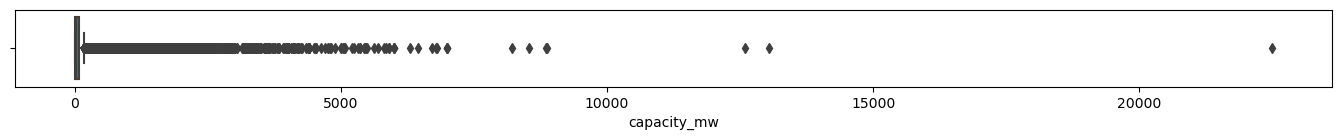

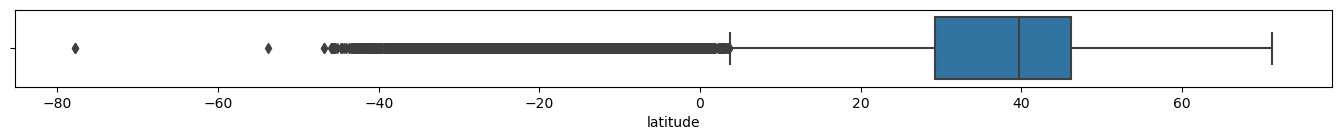

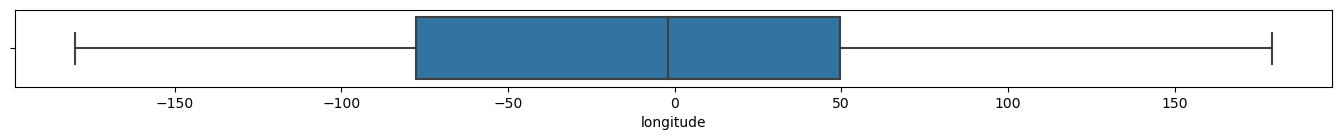

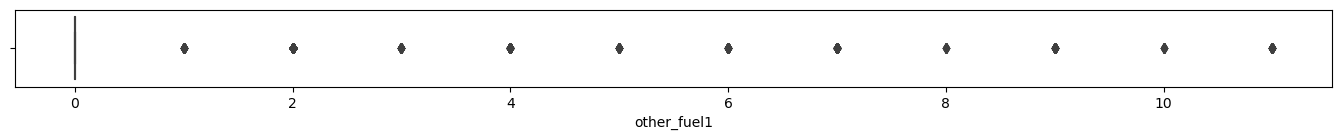

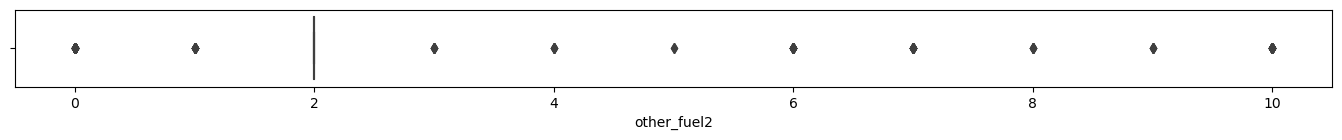

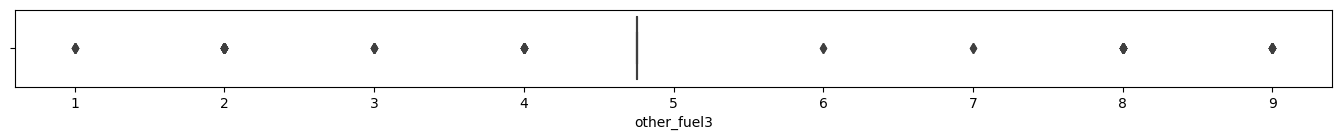

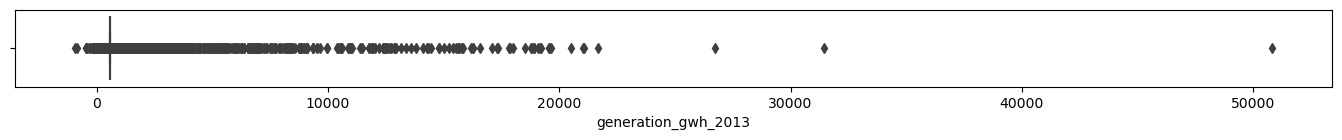

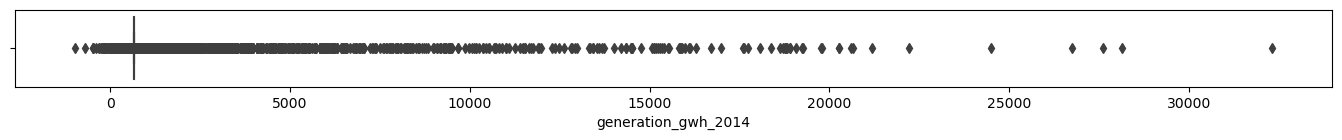

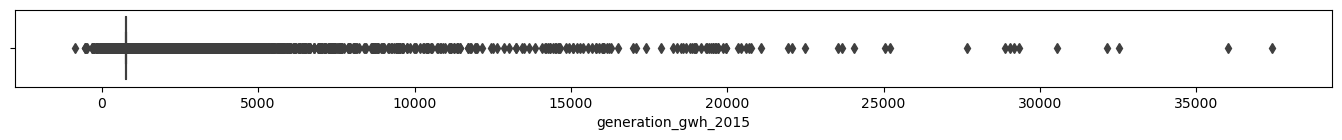

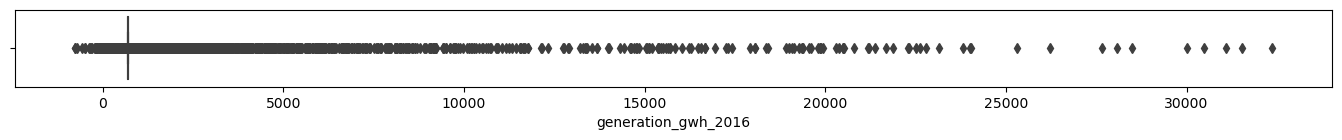

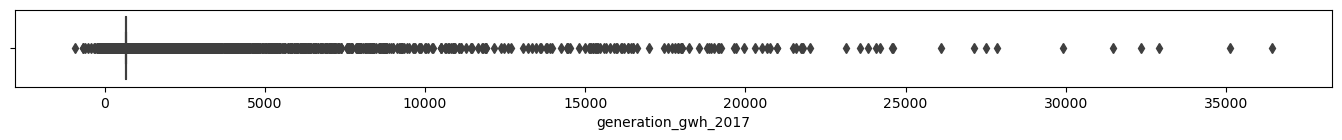

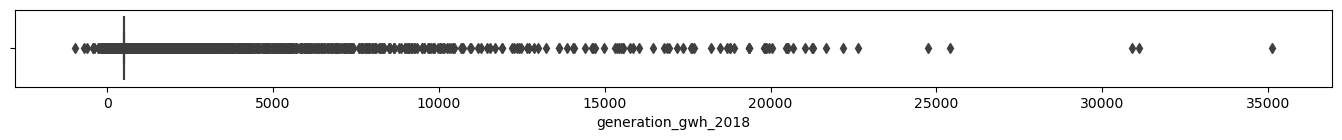

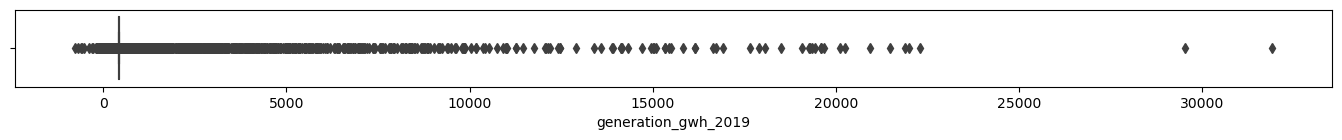

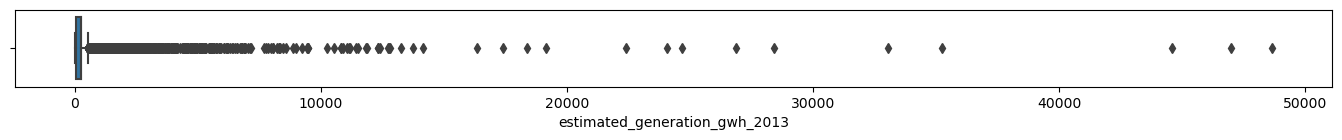

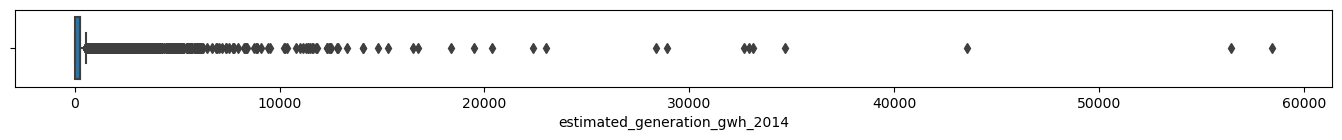

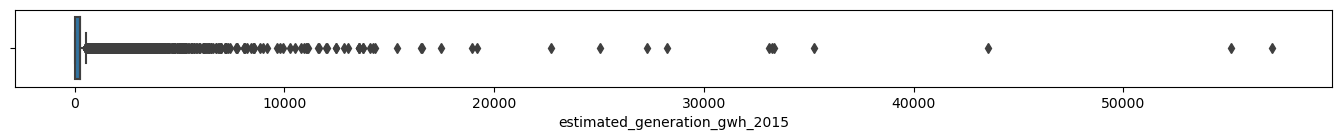

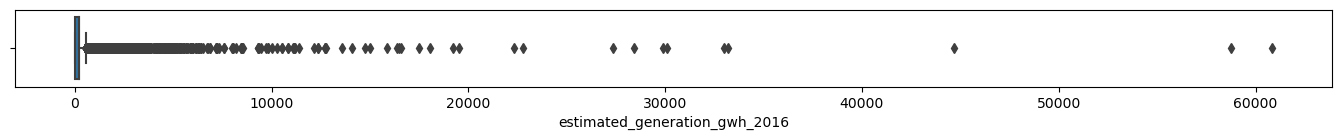

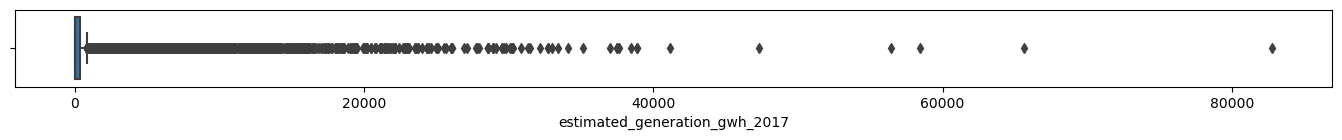

In [103]:
gpp_df_1= gpp_df.select_dtypes(exclude=['object'])
for column in gpp_df_1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=gpp_df, x=column)

In [104]:
Q1=gpp_df['capacity_mw'].quantile(0.25)
Q2=gpp_df['capacity_mw'].quantile(0.5)
Q3=gpp_df['capacity_mw'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-100.76637499999998
181.010625


In [105]:
gpp_df['capacity_mw'] = np.where(gpp_df['capacity_mw']> upplim,upplim,
                        np.where(gpp_df['capacity_mw']<lowlim,lowlim, gpp_df['capacity_mw']))


In [106]:
Q1=gpp_df['latitude'].quantile(0.25)
Q2=gpp_df['latitude'].quantile(0.5)
Q3=gpp_df['latitude'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

3.746499999999994
71.7731


In [107]:
gpp_df['latitude'] = np.where(gpp_df['latitude']> upplim,upplim,
                        np.where(gpp_df['latitude']<lowlim,lowlim, gpp_df['latitude']))


In [108]:
Q1=gpp_df['estimated_generation_gwh_2013'].quantile(0.25)
Q2=gpp_df['estimated_generation_gwh_2013'].quantile(0.5)
Q3=gpp_df['estimated_generation_gwh_2013'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-275.74333126550886
548.0255521091815


In [109]:
gpp_df['estimated_generation_gwh_2013'] = np.where(gpp_df['estimated_generation_gwh_2013']> upplim,upplim,
                        np.where(gpp_df['estimated_generation_gwh_2013']<lowlim,lowlim, gpp_df['estimated_generation_gwh_2013']))


In [110]:
Q1=gpp_df['estimated_generation_gwh_2014'].quantile(0.25)
Q2=gpp_df['estimated_generation_gwh_2014'].quantile(0.5)
Q3=gpp_df['estimated_generation_gwh_2014'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-282.5154324213793
557.3990540356322


In [111]:
gpp_df['estimated_generation_gwh_2014'] = np.where(gpp_df['estimated_generation_gwh_2014']> upplim,upplim,
                        np.where(gpp_df['estimated_generation_gwh_2014']<lowlim,lowlim, gpp_df['estimated_generation_gwh_2014']))


In [112]:
Q1=gpp_df['estimated_generation_gwh_2015'].quantile(0.25)
Q2=gpp_df['estimated_generation_gwh_2015'].quantile(0.5)
Q3=gpp_df['estimated_generation_gwh_2015'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-281.07410029325763
546.0301671554294


In [113]:
gpp_df['estimated_generation_gwh_2015'] = np.where(gpp_df['estimated_generation_gwh_2015']> upplim,upplim,
                        np.where(gpp_df['estimated_generation_gwh_2015']<lowlim,lowlim, gpp_df['estimated_generation_gwh_2015']))


In [114]:
Q1=gpp_df['estimated_generation_gwh_2016'].quantile(0.25)
Q2=gpp_df['estimated_generation_gwh_2016'].quantile(0.5)
Q3=gpp_df['estimated_generation_gwh_2016'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-285.8741478372227
548.6369130620378


In [115]:
gpp_df['estimated_generation_gwh_2016'] = np.where(gpp_df['estimated_generation_gwh_2016']> upplim,upplim,
                        np.where(gpp_df['estimated_generation_gwh_2016']<lowlim,lowlim, gpp_df['estimated_generation_gwh_2016']))


In [116]:
Q1=gpp_df['estimated_generation_gwh_2017'].quantile(0.25)
Q2=gpp_df['estimated_generation_gwh_2017'].quantile(0.5)
Q3=gpp_df['estimated_generation_gwh_2017'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-509.1587500000001
872.49125


In [117]:
gpp_df['estimated_generation_gwh_2017'] = np.where(gpp_df['estimated_generation_gwh_2017']> upplim,upplim,
                        np.where(gpp_df['estimated_generation_gwh_2017']<lowlim,lowlim, gpp_df['estimated_generation_gwh_2017']))


In [118]:
gpp_df.primary_fuel.unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In [119]:
gpp_df['primary_fuel'] = gpp_df['primary_fuel'].map({'Hydro':0,'Solar':1,'Gas':3,'Oil':4,'Wind':5,'Nuclear':6,'Coal':7,'Waste':8,'Biomass':9,'Wave and Tidal':10,'Petcoke':11,'Geothermal':12,'Storage':13,'Cogeneration':14,'Other':15})


In [120]:
gpp_df.drop(['estimated_generation_note_2013','estimated_generation_note_2014','estimated_generation_note_2015','estimated_generation_note_2016','estimated_generation_note_2017'], axis=1,inplace = True)


# Predicting capacity_mw

In [121]:
features = gpp_df.drop(columns = ['capacity_mw','country_long','name'],axis=1)
label= gpp_df['capacity_mw']
X = features
Y=label

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 0)

In [123]:
gpp_df.isnull().sum()

country_long                     0
name                             0
capacity_mw                      0
latitude                         0
longitude                        0
primary_fuel                     0
other_fuel1                      0
other_fuel2                      0
other_fuel3                      0
generation_gwh_2013              0
generation_gwh_2014              0
generation_gwh_2015              0
generation_gwh_2016              0
generation_gwh_2017              0
generation_gwh_2018              0
generation_gwh_2019              0
estimated_generation_gwh_2013    0
estimated_generation_gwh_2014    0
estimated_generation_gwh_2015    0
estimated_generation_gwh_2016    0
estimated_generation_gwh_2017    0
dtype: int64

In [124]:
gpp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_long                   34936 non-null  object 
 1   name                           34936 non-null  object 
 2   capacity_mw                    34936 non-null  float64
 3   latitude                       34936 non-null  float64
 4   longitude                      34936 non-null  float64
 5   primary_fuel                   34936 non-null  int64  
 6   other_fuel1                    34936 non-null  float64
 7   other_fuel2                    34936 non-null  float64
 8   other_fuel3                    34936 non-null  float64
 9   generation_gwh_2013            34936 non-null  float64
 10  generation_gwh_2014            34936 non-null  float64
 11  generation_gwh_2015            34936 non-null  float64
 12  generation_gwh_2016            34936 non-null 

In [125]:
print(np.isnan(X_train).any())
print(np.isinf(X_train).any())
print(np.isnan(Y_train).any())
print(np.isinf(Y_train).any())

latitude                         False
longitude                        False
primary_fuel                     False
other_fuel1                      False
other_fuel2                      False
other_fuel3                      False
generation_gwh_2013              False
generation_gwh_2014              False
generation_gwh_2015              False
generation_gwh_2016              False
generation_gwh_2017              False
generation_gwh_2018              False
generation_gwh_2019              False
estimated_generation_gwh_2013    False
estimated_generation_gwh_2014    False
estimated_generation_gwh_2015    False
estimated_generation_gwh_2016    False
estimated_generation_gwh_2017    False
dtype: bool
latitude                         False
longitude                        False
primary_fuel                     False
other_fuel1                      False
other_fuel2                      False
other_fuel3                      False
generation_gwh_2013              False
generation_gw

In [126]:
gpp_df['generation_gwh_2013'].fillna(gpp_df['generation_gwh_2013'].mean(), inplace=True)


In [127]:
print(np.isnan(X_train).any())
print(np.isinf(X_train).any())
print(np.isnan(Y_train).any())
print(np.isinf(Y_train).any())

latitude                         False
longitude                        False
primary_fuel                     False
other_fuel1                      False
other_fuel2                      False
other_fuel3                      False
generation_gwh_2013              False
generation_gwh_2014              False
generation_gwh_2015              False
generation_gwh_2016              False
generation_gwh_2017              False
generation_gwh_2018              False
generation_gwh_2019              False
estimated_generation_gwh_2013    False
estimated_generation_gwh_2014    False
estimated_generation_gwh_2015    False
estimated_generation_gwh_2016    False
estimated_generation_gwh_2017    False
dtype: bool
latitude                         False
longitude                        False
primary_fuel                     False
other_fuel1                      False
other_fuel2                      False
other_fuel3                      False
generation_gwh_2013              False
generation_gw

In [128]:
gpp_df.isnull().sum()


country_long                     0
name                             0
capacity_mw                      0
latitude                         0
longitude                        0
primary_fuel                     0
other_fuel1                      0
other_fuel2                      0
other_fuel3                      0
generation_gwh_2013              0
generation_gwh_2014              0
generation_gwh_2015              0
generation_gwh_2016              0
generation_gwh_2017              0
generation_gwh_2018              0
generation_gwh_2019              0
estimated_generation_gwh_2013    0
estimated_generation_gwh_2014    0
estimated_generation_gwh_2015    0
estimated_generation_gwh_2016    0
estimated_generation_gwh_2017    0
dtype: int64

In [129]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
gpp_df.isnull().sum()

country_long                     0
name                             0
capacity_mw                      0
latitude                         0
longitude                        0
primary_fuel                     0
other_fuel1                      0
other_fuel2                      0
other_fuel3                      0
generation_gwh_2013              0
generation_gwh_2014              0
generation_gwh_2015              0
generation_gwh_2016              0
generation_gwh_2017              0
generation_gwh_2018              0
generation_gwh_2019              0
estimated_generation_gwh_2013    0
estimated_generation_gwh_2014    0
estimated_generation_gwh_2015    0
estimated_generation_gwh_2016    0
estimated_generation_gwh_2017    0
dtype: int64

In [131]:
lr = LinearRegression()

In [132]:
lr.fit(X_train,Y_train)

LinearRegression()

In [133]:
Y_pred_4= lr.predict(X_test)

In [134]:
print("Training Accuracy : {}%".format(lr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(lr.score(X_test, Y_test) * 100))

Training Accuracy : 79.87087113251621%
Testing Accuracy  : 80.39630619760162%


In [135]:
print('MAE', mean_absolute_error(Y_test,Y_pred_4))


MAE 18.913009958885795


In [174]:
cv_score_lr = cross_val_score(LinearRegression(),X,Y,cv=10)
print (cv_score_lr.mean()*100)

27.03908950625725


In [136]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [137]:
knn.fit(X_train,Y_train)


KNeighborsRegressor()

In [138]:
y_pred= knn.predict(X_test)


In [139]:
print("Training Accuracy : {}%".format(knn.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(knn.score(X_test, Y_test) * 100))

Training Accuracy : 97.33723822288115%
Testing Accuracy  : 95.50385889736178%


In [140]:
cv_score_knn = cross_val_score(KNeighborsRegressor(),X,Y,cv=10)
print (cv_score_knn.mean()*100)

89.59286214922105


In [67]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
y_pred_2=dtr.predict(X_test)

In [68]:
print("Training Accuracy : {}%".format(dtr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(dtr.score(X_test, Y_test) * 100))

Training Accuracy : 99.97504880795131%
Testing Accuracy  : 94.7089730632387%


In [69]:
cv_score_dtr = cross_val_score(DecisionTreeRegressor(),X,Y,cv=10)
print (cv_score_dtr.mean()*100)

91.02424751787677


In [70]:
rdr = RandomForestRegressor()
rdr.fit(X_train,Y_train)
y_pred_3=rdr.predict(X_test)

In [133]:
print("Training Accuracy : {}%".format(rdr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(rdr.score(X_test, Y_test) * 100))

Training Accuracy : 99.52609327855448%
Testing Accuracy  : 96.67292190395811%


In [175]:
cv_score_rdr = cross_val_score(RandomForestRegressor(),X,Y,cv=10)
print (cv_score_rdr.mean()*100)

75.91416602485921


WE CAN CHECK THE knn MODEL IS PERFORMING THE BEST AS IT IS GIVING THE HIGHEST ACCURACY OF 89%


# PREDICTING PRIMARY FUEL 

In [143]:
features = gpp_df.drop(columns = ['primary_fuel','country_long','name'],axis=1)
label= gpp_df['primary_fuel']
X = features
Y=label

In [144]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size= 0.2, random_state = 0)

In [151]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_val)

In [152]:
lr = LogisticRegression()


In [153]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [154]:
y_pred_1= lr.predict(X_val)

In [155]:
print("Training Accuracy : {}%".format(lr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(lr.score(X_val, Y_val) * 100))

Training Accuracy : 61.82195505939602%
Testing Accuracy  : 13.880938752146537%


In [156]:
cv_score_lr = cross_val_score(LogisticRegression(),X,Y,cv=10)
print (cv_score_lr.mean()*100)

55.56176462828347


In [157]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [158]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [159]:
y_pred_2= knn.predict(X_val)

In [160]:
print("Training Accuracy : {}%".format(knn.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(knn.score(X_val, Y_val) * 100))

Training Accuracy : 90.82939745241163%
Testing Accuracy  : 2.3898111047510016%


In [161]:
cv_score_knn = cross_val_score(KNeighborsClassifier(),X,Y,cv=10)
print (cv_score_knn.mean()*100)

75.04042675259753


In [162]:
dc = DecisionTreeClassifier()

In [163]:
dc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [164]:
y_pred_2= dc.predict(X_val)

In [165]:
print("Training Accuracy : {}%".format(dc.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(dc.score(X_val, Y_val) * 100))

Training Accuracy : 99.98568770573924%
Testing Accuracy  : 19.562106468231253%


In [166]:
cv_score_dc = cross_val_score(DecisionTreeClassifier(),X,Y,cv=10)
print (cv_score_dc.mean()*100)

76.28301742089134


In [167]:
rdr = RandomForestClassifier()
rdr.fit(X_train,Y_train)
y_pred_3=rdr.predict(X_val)

In [168]:
print("Training Accuracy : {}%".format(rdr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(rdr.score(X_val, Y_val) * 100))

Training Accuracy : 99.98568770573924%
Testing Accuracy  : 19.562106468231253%


In [169]:
cv_score_rdr = cross_val_score(RandomForestClassifier(),X,Y,cv=10)
print (cv_score_rdr.mean()*100)

81.78425212515144


# FINDINGS 

WE CAN CHECK THE RandomForestClassifier MODEL IS PERFORMING THE BEST AS IT IS GIVING THE HIGHEST ACCURACY OF 83%
